In [10]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('./src')
import similarityMatrix as sMatr
import laplacian

In [2]:
img = sMatr.getCircleMatrix() #get matrix with two circle at (28, 24) and (67, 58) with redius 16 and 5
a = sMatr.getDiagMatrix() #just regular diagonal matrix
o1 = sMatr.getOffDiagMatrix(5) #diagonal matrix with thickness at that time point
o2 = sMatr.getOffDiagMatrixII(5) #diagonal matrix with thickness along all time points
o3 = sMatr.getOffDiagMatrixIII(3,5) #diagonal matrix with thickness along all time points, with number of breaks

print (o3 == np.transpose(o3)).all() #check o3 is symmetric

True


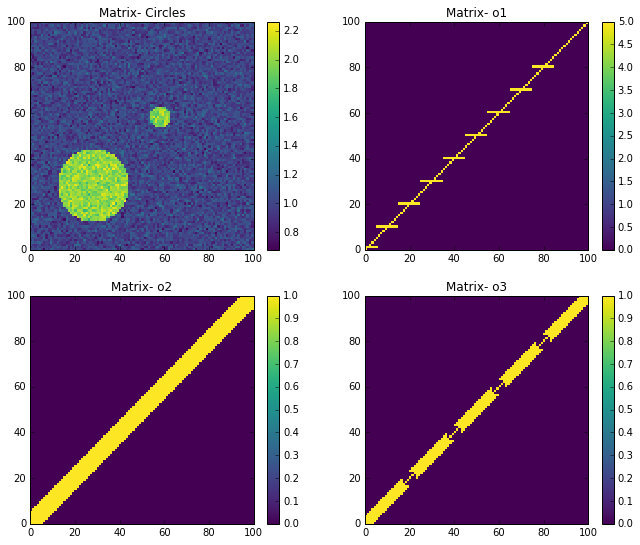

In [6]:
plt.subplot(2, 2, 1)
# R = np.corrcoef(img)
plt.pcolor(img, cmap="viridis")
plt.colorbar()
plt.title('Matrix- Circles')


plt.subplot(2, 2, 2)
# R = np.corrcoef(o1)
plt.pcolor(o1, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o1')

plt.subplot(2, 2, 3)
# R = np.corrcoef(o2)
plt.pcolor(o2, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o2')

plt.subplot(2, 2, 4)
# R = np.corrcoef(o3)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')

plt.show()

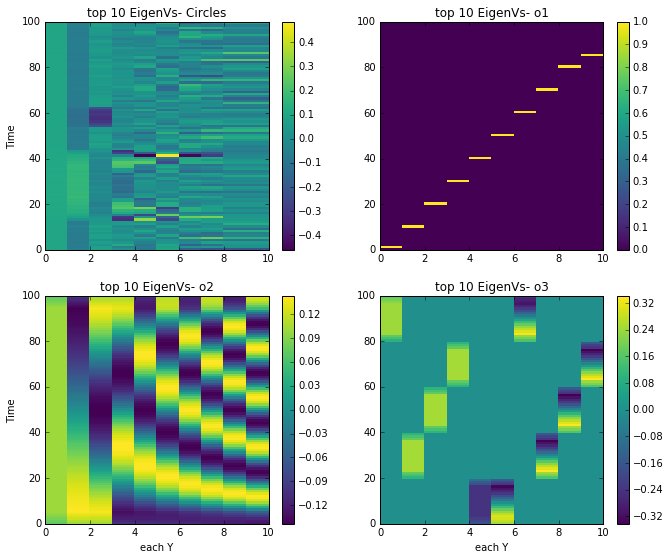

In [8]:
#basically using laplacian to get eigenvectors, and construct Y by selecting top m smallest eigenvalues
Y0 = laplacian.getNormLaplacian(img, 10) #similarity matrix, top m eigenvectors
Y1 = laplacian.getNormLaplacian(o1, 10)
Y2 = laplacian.getNormLaplacian(o2, 10)
Y3 = laplacian.getNormLaplacian(o3, 10)

plt.subplot(2, 2, 1)
plt.pcolor(Y0, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- Circles')
plt.ylabel('Time')

plt.subplot(2, 2, 2)
plt.pcolor(Y1, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o1')

plt.subplot(2, 2, 3)
plt.pcolor(Y2, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o2')
plt.ylabel('Time')
plt.xlabel('each Y')

plt.subplot(2, 2, 4)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o3')
plt.xlabel('each Y')

plt.show()

# Focus on o3

(100, 25)


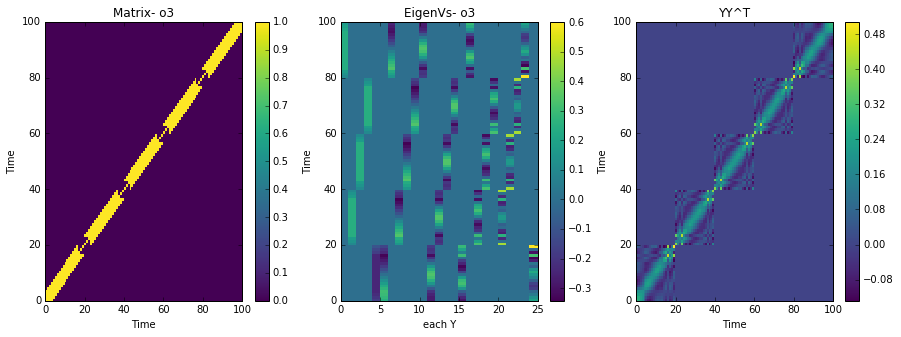

In [47]:
Y3 = laplacian.getNormLaplacian(o3, 25) #similarity matrix, top m eigenvectors
YY = np.dot(Y3[:,:], np.transpose(Y3)[:,:])
print Y3.shape

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('EigenVs- o3')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(1, 3, 3)
plt.pcolor(YY, cmap="viridis")
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()

[19, 39, 59, 79]


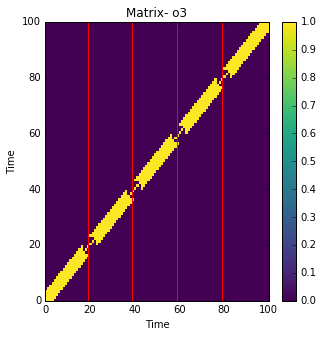

In [60]:
from sklearn.cluster import KMeans
nCluster = 4
Y3 = laplacian.getNormLaplacian(o3, 10) #similarity matrix, top m eigenvectors

def boundaryDetection(Y, nCluster):
    row_leng = np.linalg.norm(Y, axis=1) #get length of each row
    row_leng[row_leng==0] = 1 #replace the legth of 0 to 1
    Y_norm = Y / row_leng[:, np.newaxis]

    clf = KMeans(n_clusters=nCluster, max_iter=500).fit(Y_norm)
    centroids, labels = clf.cluster_centers_, clf.labels_

    boundary = []
    for idx in xrange(len(labels)-1):
        if labels[idx] != labels[idx+1]:
            boundary += [idx]
    
    return boundary, centroids

b, c = boundaryDetection(Y3, nCluster)
print b

plt.figure(figsize=(5, 5))
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.vlines(b, 0, 100, color='r')
plt.title('Matrix- o3')
plt.xlabel('Time')
plt.ylabel('Time')

# Focus on img

(100, 100)


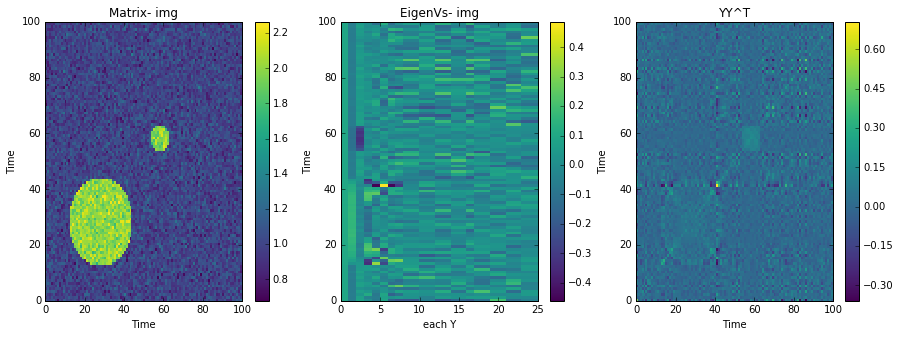

In [48]:
IMG = laplacian.getNormLaplacian(img, 25) #similarity matrix, top m eigenvectors
II = np.dot(IMG[:,:], np.transpose(IMG)[:,:])
print II.shape

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pcolor(img, cmap="viridis")
plt.colorbar()
plt.title('Matrix- img')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.pcolor(IMG, cmap="viridis")
plt.colorbar()
plt.title('EigenVs- img')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(1, 3, 3)
plt.pcolor(II, cmap="viridis")
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()

[9, 19, 29, 39, 49, 59, 69, 79, 89]


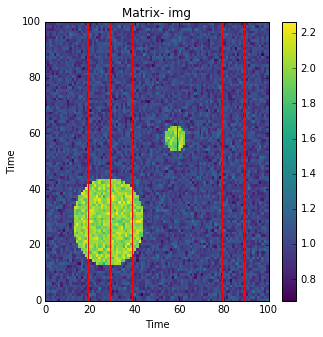

In [61]:
nCluster = 10
IMG = laplacian.getNormLaplacian(img, 10) #similarity matrix, top m eigenvectors
b, c = boundaryDetection(Y3, nCluster)
print b

plt.figure(figsize=(5, 5))
plt.pcolor(img, cmap="viridis")
plt.colorbar()
plt.vlines(b, 0, 100, color='r')
plt.title('Matrix- img')
plt.xlabel('Time')
plt.ylabel('Time')